In [1]:
import numpy as np
data = np.load("../hydrax/logs/controls_rollouts_full_.npz", allow_pickle=True)


In [2]:
tq = data["tq"]
us = data["us"]
rollouts = data["rollouts"].tolist()  # list of dicts
best_traces = data["best_traces"]  
best_us = data["best_us"]  

In [3]:
# Extract and display all keys
print("Available keys in the data file:")
print("-" * 40)
for key in data.keys():
    value = data[key]
    if hasattr(value, 'shape'):
        print(f"'{key}': shape {value.shape}")
    else:
        print(f"'{key}': {value}")

print(f"\nTotal keys: {len(data.keys())}")

Available keys in the data file:
----------------------------------------
'tq': shape (591,)
'us': shape (591, 1)
'best_us': shape (591, 50, 1)
'best_traces': shape (591, 51, 1, 3)
'rollouts': shape (591,)

Total keys: 5


In [4]:
for i, rollout in enumerate(data['rollouts']):
    print(f"\nRollout {i}:")
    for k, v in rollout.items():
        try:
            print(f"  {k}: shape {np.shape(v)}")
        except:
            print(f"  {k}: type {type(v)}")



Rollout 0:
  controls: shape (32, 50, 1)
  trace_sites: shape (32, 51, 1, 3)
  costs: shape (32, 51)
  knots: shape (32, 11, 1)

Rollout 1:
  controls: shape (32, 50, 1)
  trace_sites: shape (32, 51, 1, 3)
  costs: shape (32, 51)
  knots: shape (32, 11, 1)

Rollout 2:
  controls: shape (32, 50, 1)
  trace_sites: shape (32, 51, 1, 3)
  costs: shape (32, 51)
  knots: shape (32, 11, 1)

Rollout 3:
  controls: shape (32, 50, 1)
  trace_sites: shape (32, 51, 1, 3)
  costs: shape (32, 51)
  knots: shape (32, 11, 1)

Rollout 4:
  controls: shape (32, 50, 1)
  trace_sites: shape (32, 51, 1, 3)
  costs: shape (32, 51)
  knots: shape (32, 11, 1)

Rollout 5:
  controls: shape (32, 50, 1)
  trace_sites: shape (32, 51, 1, 3)
  costs: shape (32, 51)
  knots: shape (32, 11, 1)

Rollout 6:
  controls: shape (32, 50, 1)
  trace_sites: shape (32, 51, 1, 3)
  costs: shape (32, 51)
  knots: shape (32, 11, 1)

Rollout 7:
  controls: shape (32, 50, 1)
  trace_sites: shape (32, 51, 1, 3)
  costs: shape (32,

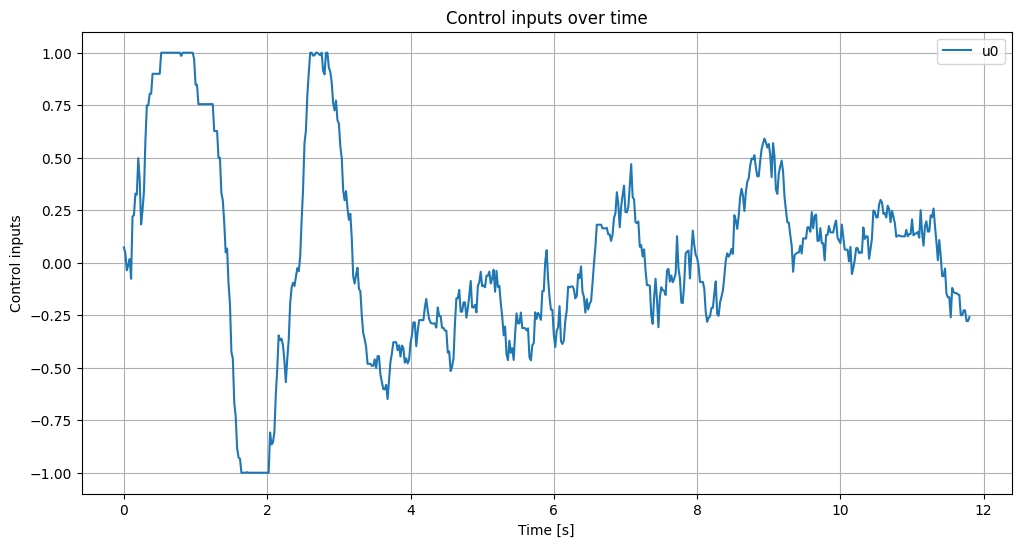

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data (you already did this)
# data = np.load("../hydrax/logs/controls_full.npz")
# tq = data["tq"]
# us = data["us"]

# us shape: (num_timesteps, num_controls)
num_controls = us.shape[1]

plt.figure(figsize=(12, 6))
for i in range(num_controls):
    plt.plot(tq, us[:, i], label=f"u{i}")

plt.xlabel("Time [s]")
plt.ylabel("Control inputs")
plt.title("Control inputs over time")
plt.legend()
plt.grid(True)
plt.show()


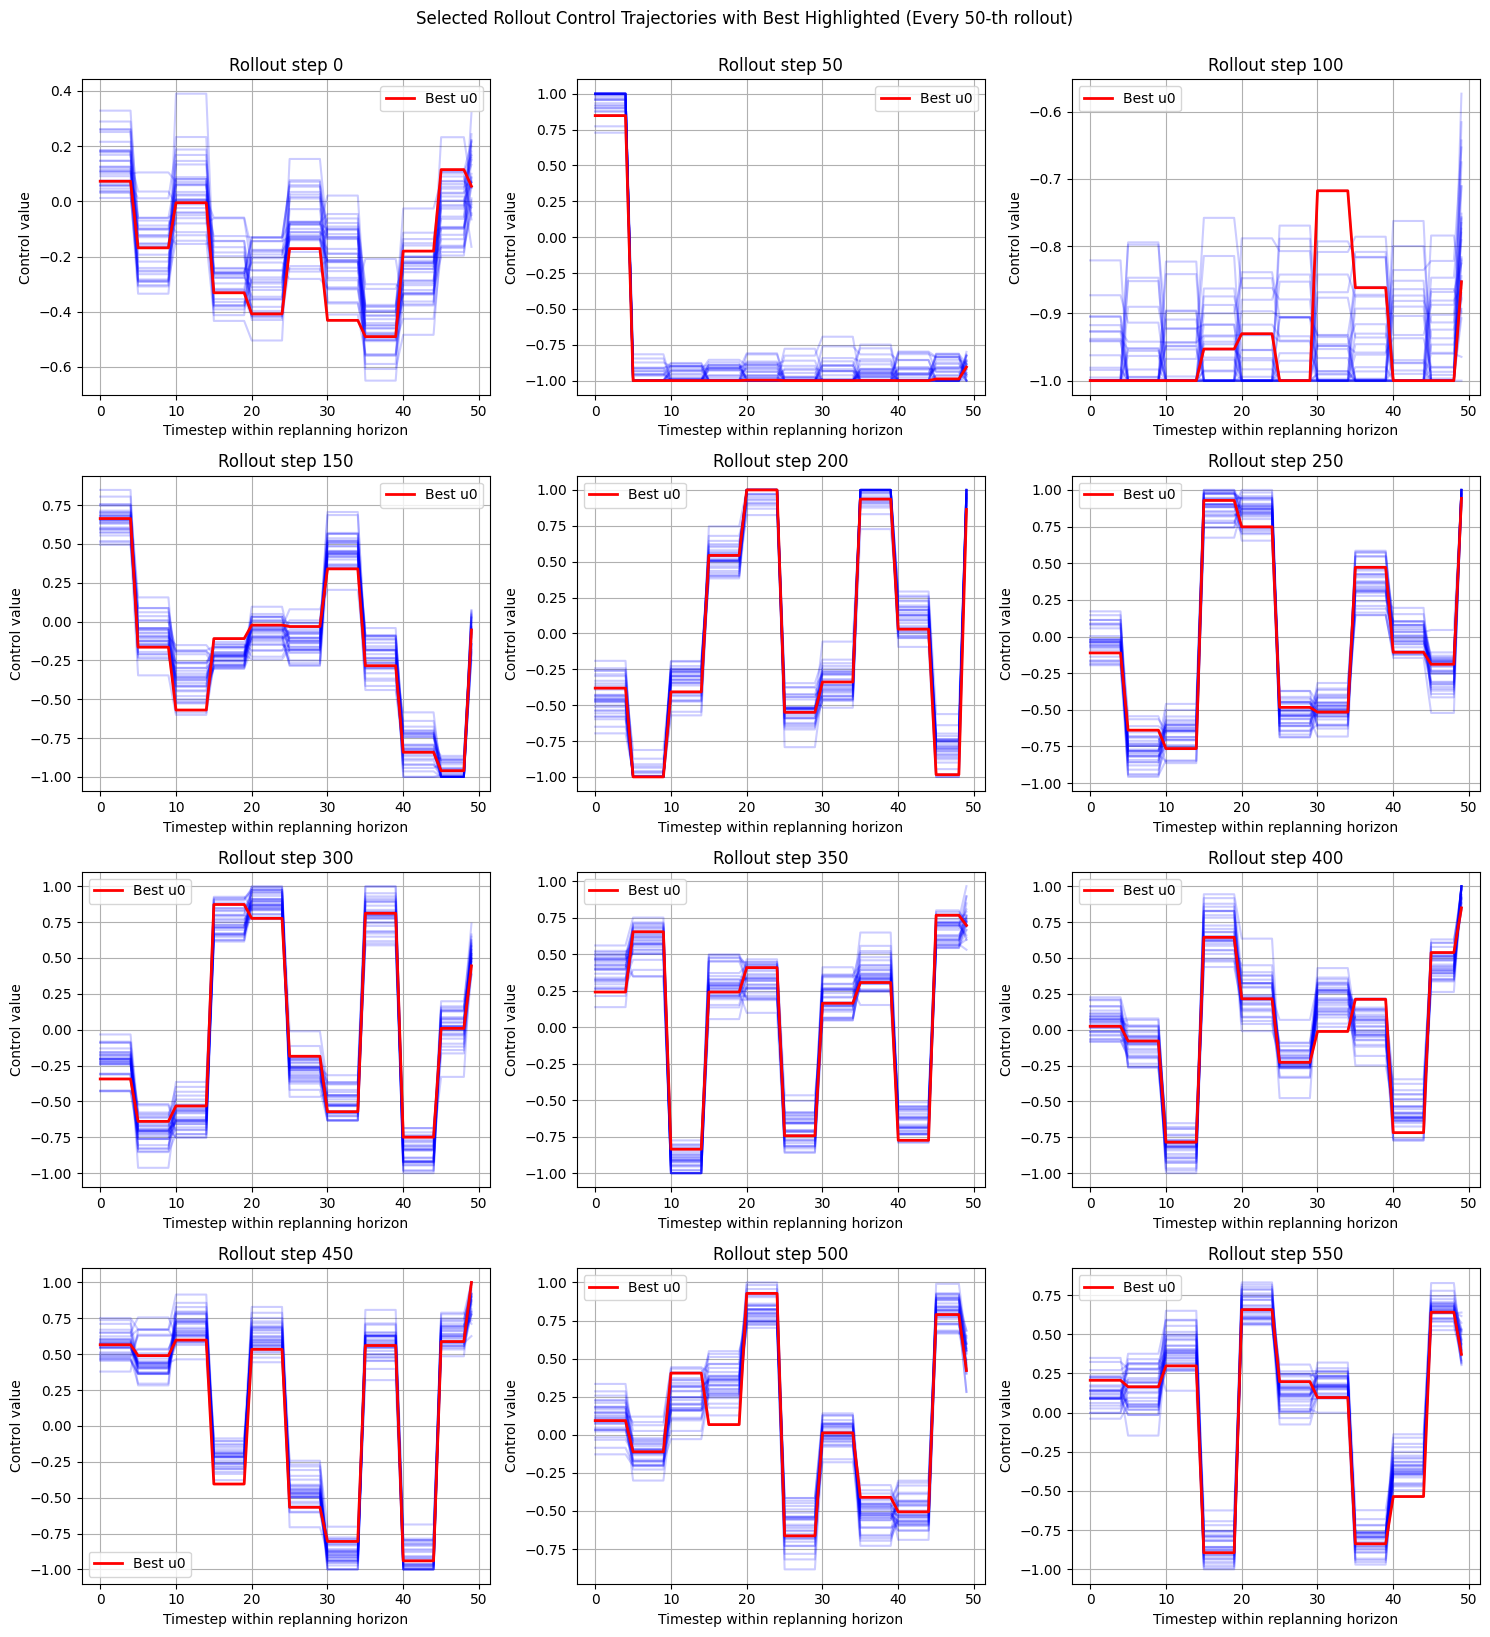

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

step_interval = 50
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)

plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

plt.figure(figsize=(5 * plots_per_row, 4 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    plt.subplot(num_rows, plots_per_row, plot_idx + 1)
    
    rollout = rollouts[rollout_idx]
    rollout_control = rollout["controls"]  # (num_samples, ctrl_steps, nu)
    rollout_costs = rollout["costs"]       # (num_samples, ctrl_steps) 
    num_samples, ctrl_steps, nu = rollout_control.shape
    time = np.linspace(0, ctrl_steps - 1, ctrl_steps)

    # Identify best rollout (lowest total cost)
    total_costs = rollout_costs.sum(axis=1)  # sum over horizon
    best_idx = int(np.argmin(total_costs))
    
    # Plot all sampled controls with transparency
    for i in range(nu):
        for s in range(num_samples):
            plt.plot(time, rollout_control[s, :, i], color="blue", alpha=0.2)
    
    # Highlight the best rollout in red
    for i in range(nu):
        plt.plot(time, rollout_control[best_idx, :, i], color="red", linewidth=2, label=f"Best u{i}")

    plt.xlabel("Timestep within replanning horizon")
    plt.ylabel("Control value")
    plt.title(f"Rollout step {rollout_idx}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle(f"Selected Rollout Control Trajectories with Best Highlighted (Every {step_interval}-th rollout)", y=1.02)
plt.show()


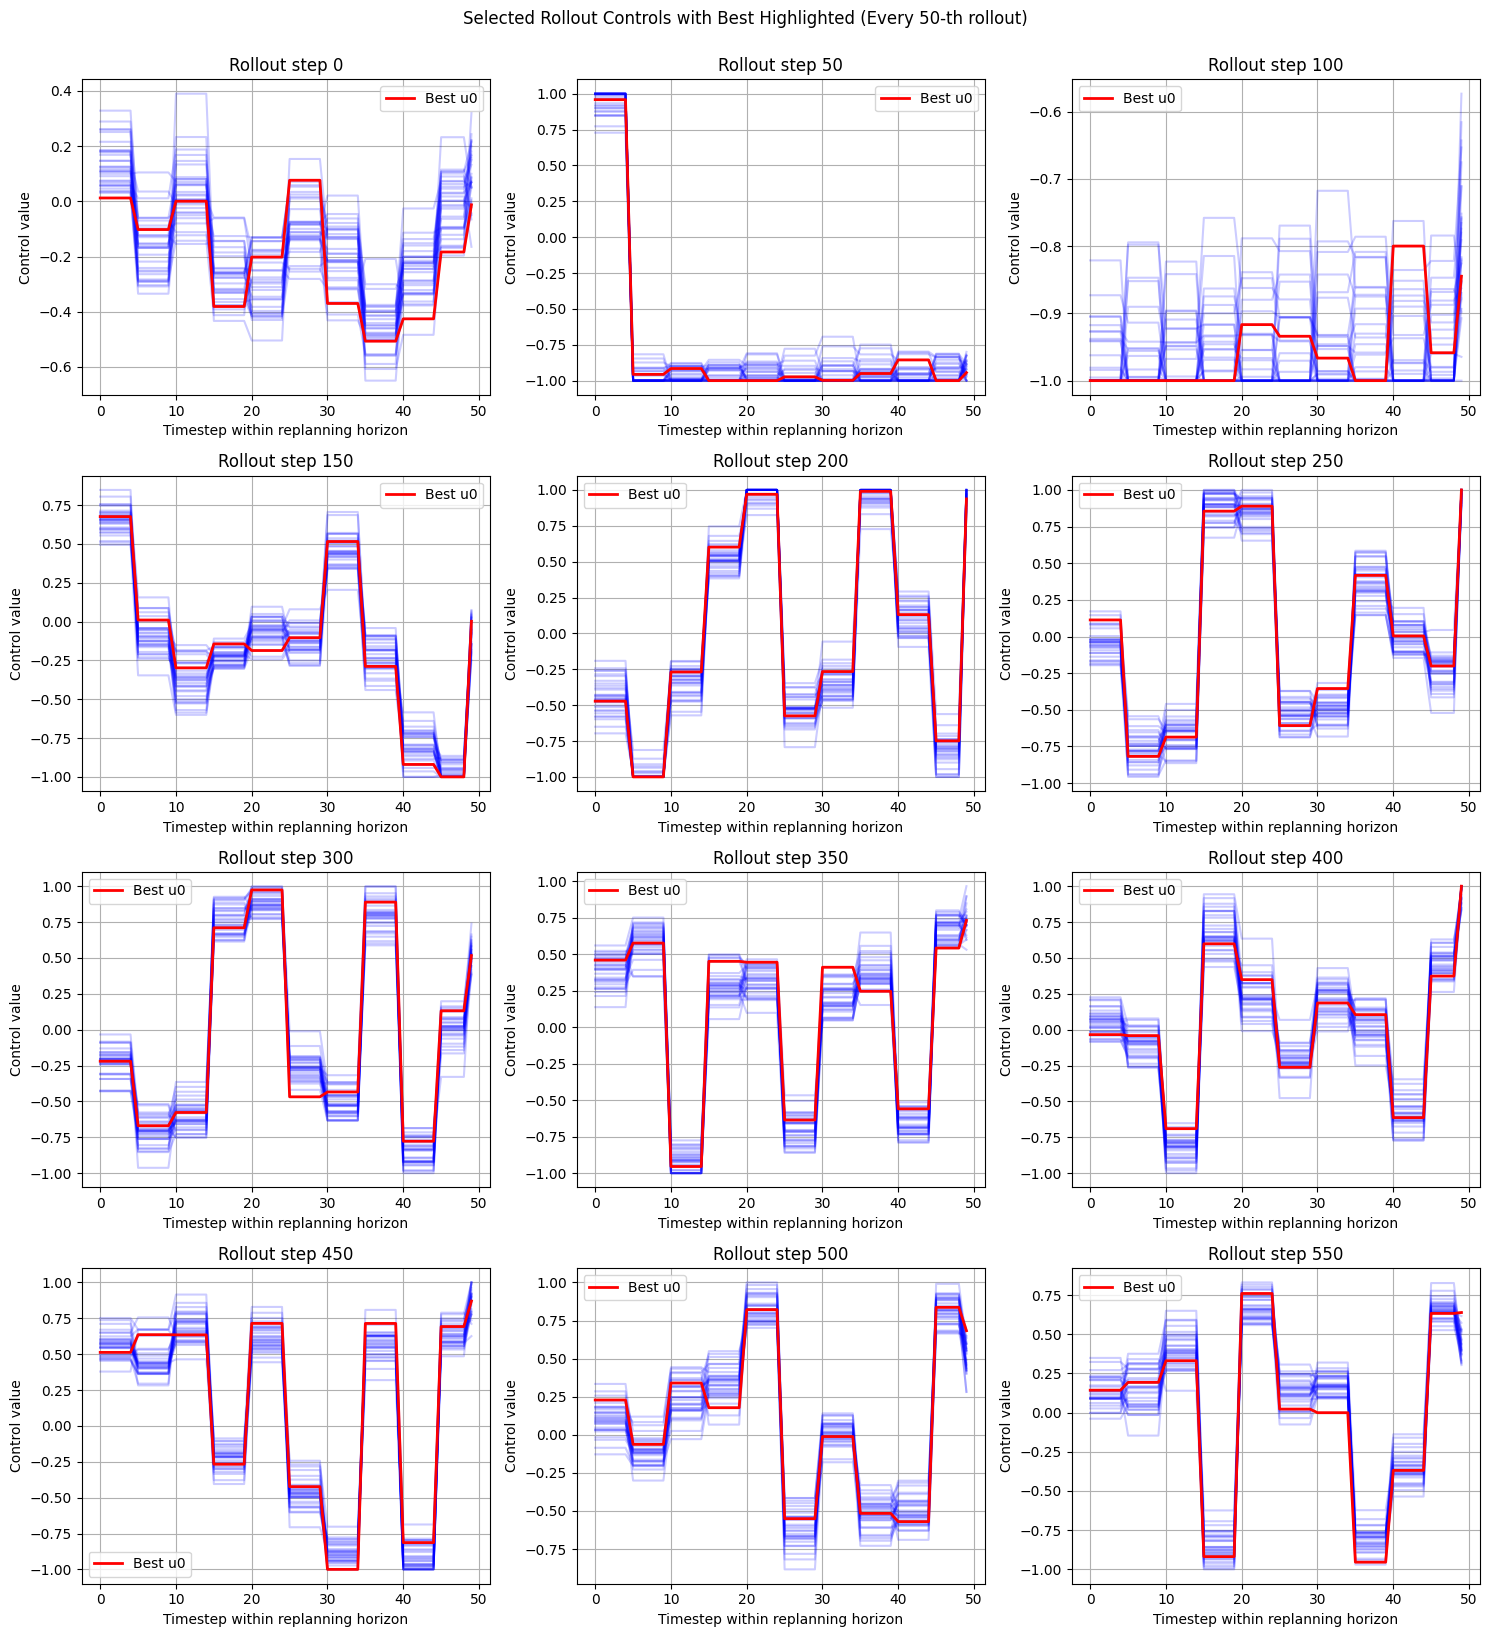

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

step_interval = 50
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

plt.figure(figsize=(5 * plots_per_row, 4 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    plt.subplot(num_rows, plots_per_row, plot_idx + 1)
    
    rollout_control = rollouts[rollout_idx]["controls"]  # (num_samples, ctrl_steps, nu)
    num_samples, ctrl_steps, nu = rollout_control.shape
    time = np.linspace(0, ctrl_steps - 1, ctrl_steps)

    # Plot all sampled controls faintly
    for i in range(nu):
        for s in range(num_samples):
            plt.plot(time, rollout_control[s, :, i], color="blue", alpha=0.2)

    # Overlay the best control horizon
    best_control = best_us[rollout_idx]  # shape (ctrl_steps, nu)
    for i in range(nu):
        plt.plot(time, best_control[:, i], color="red", linewidth=2, label=f"Best u{i}")

    plt.xlabel("Timestep within replanning horizon")
    plt.ylabel("Control value")
    plt.title(f"Rollout step {rollout_idx}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle(f"Selected Rollout Controls with Best Highlighted (Every {step_interval}-th rollout)", y=1.02)
plt.show()


In [7]:
# print(rollout_control.shape)
# print(rollouts[0]["controls"].shape)

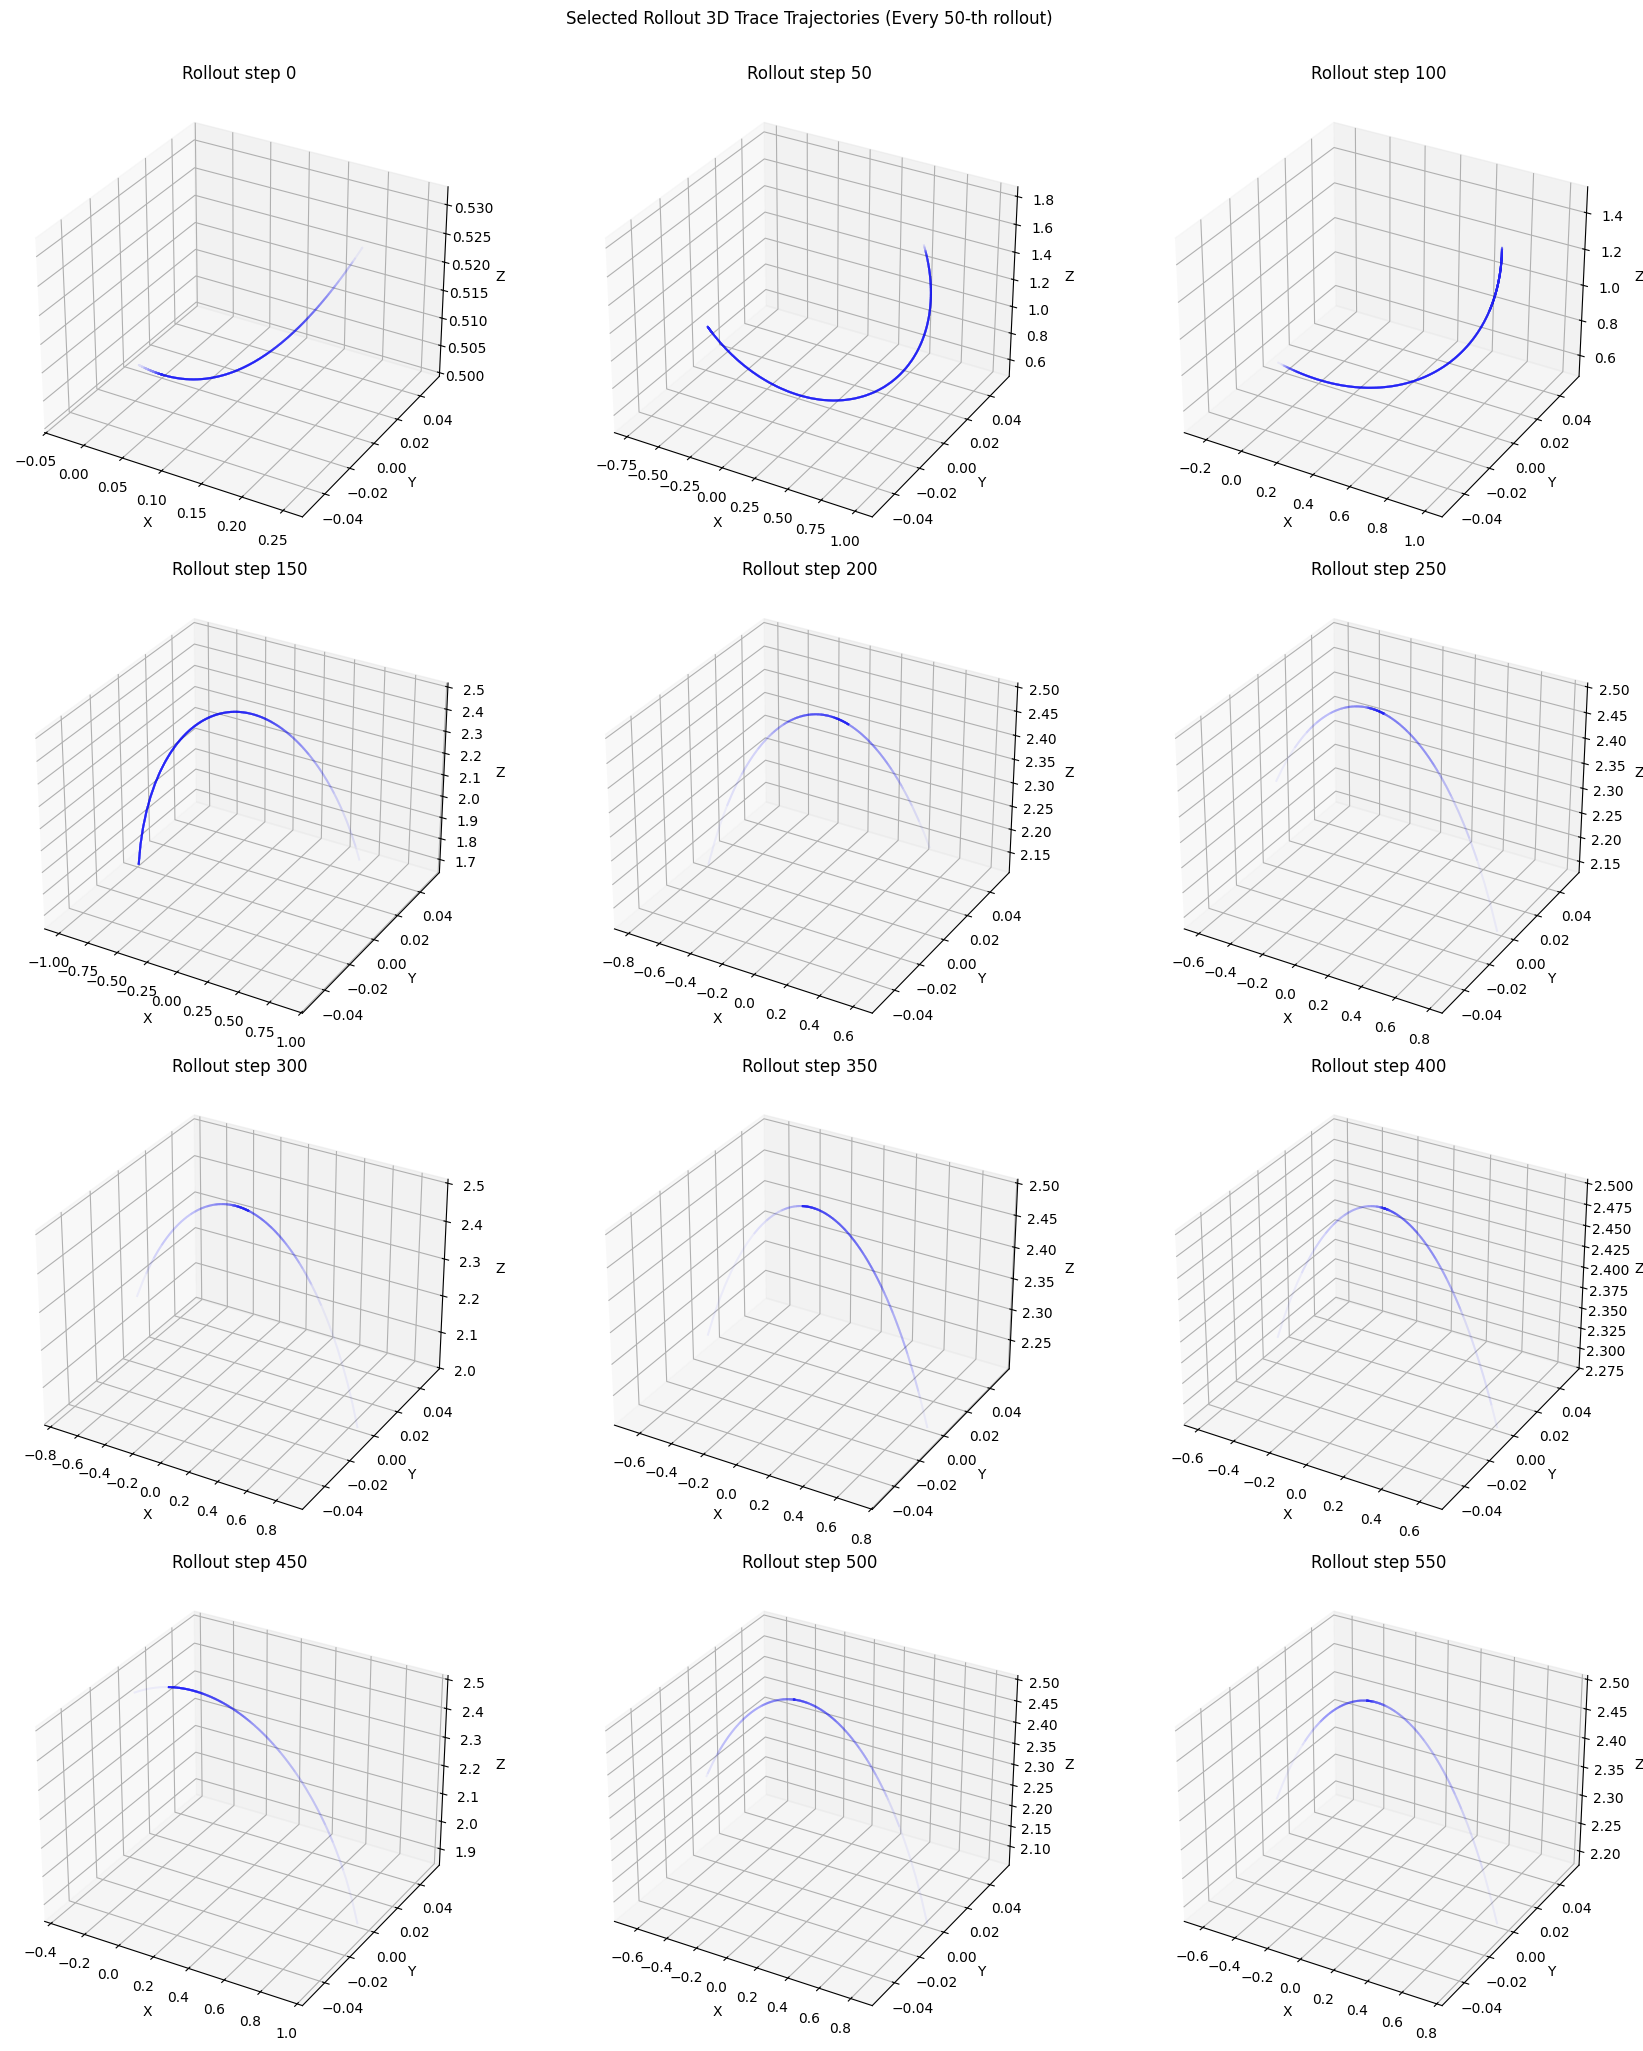

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

step_interval = 50
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

fig = plt.figure(figsize=(6 * plots_per_row, 5 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    ax = fig.add_subplot(num_rows, plots_per_row, plot_idx + 1, projection="3d")

    rollout_trace = rollouts[rollout_idx]["trace_sites"]  # shape (num_samples, steps, sites, 3)
    num_samples, steps, sites, _ = rollout_trace.shape

    # Only one site, so take index 0
    trace_data = rollout_trace[:, :, 0, :]  # (num_samples, steps, 3)

    # Plot all sample traces with high transparency
    for s in range(num_samples):
        ax.plot(
            trace_data[s, :, 0],  # x
            trace_data[s, :, 1],  # y
            trace_data[s, :, 2],  # z
            alpha=0.05,           # increased transparency
            color="blue"
        )

    ax.set_title(f"Rollout step {rollout_idx}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.grid(True)

plt.tight_layout()
plt.suptitle(f"Selected Rollout 3D Trace Trajectories (Every {step_interval}-th rollout)", y=1.02)
plt.show()


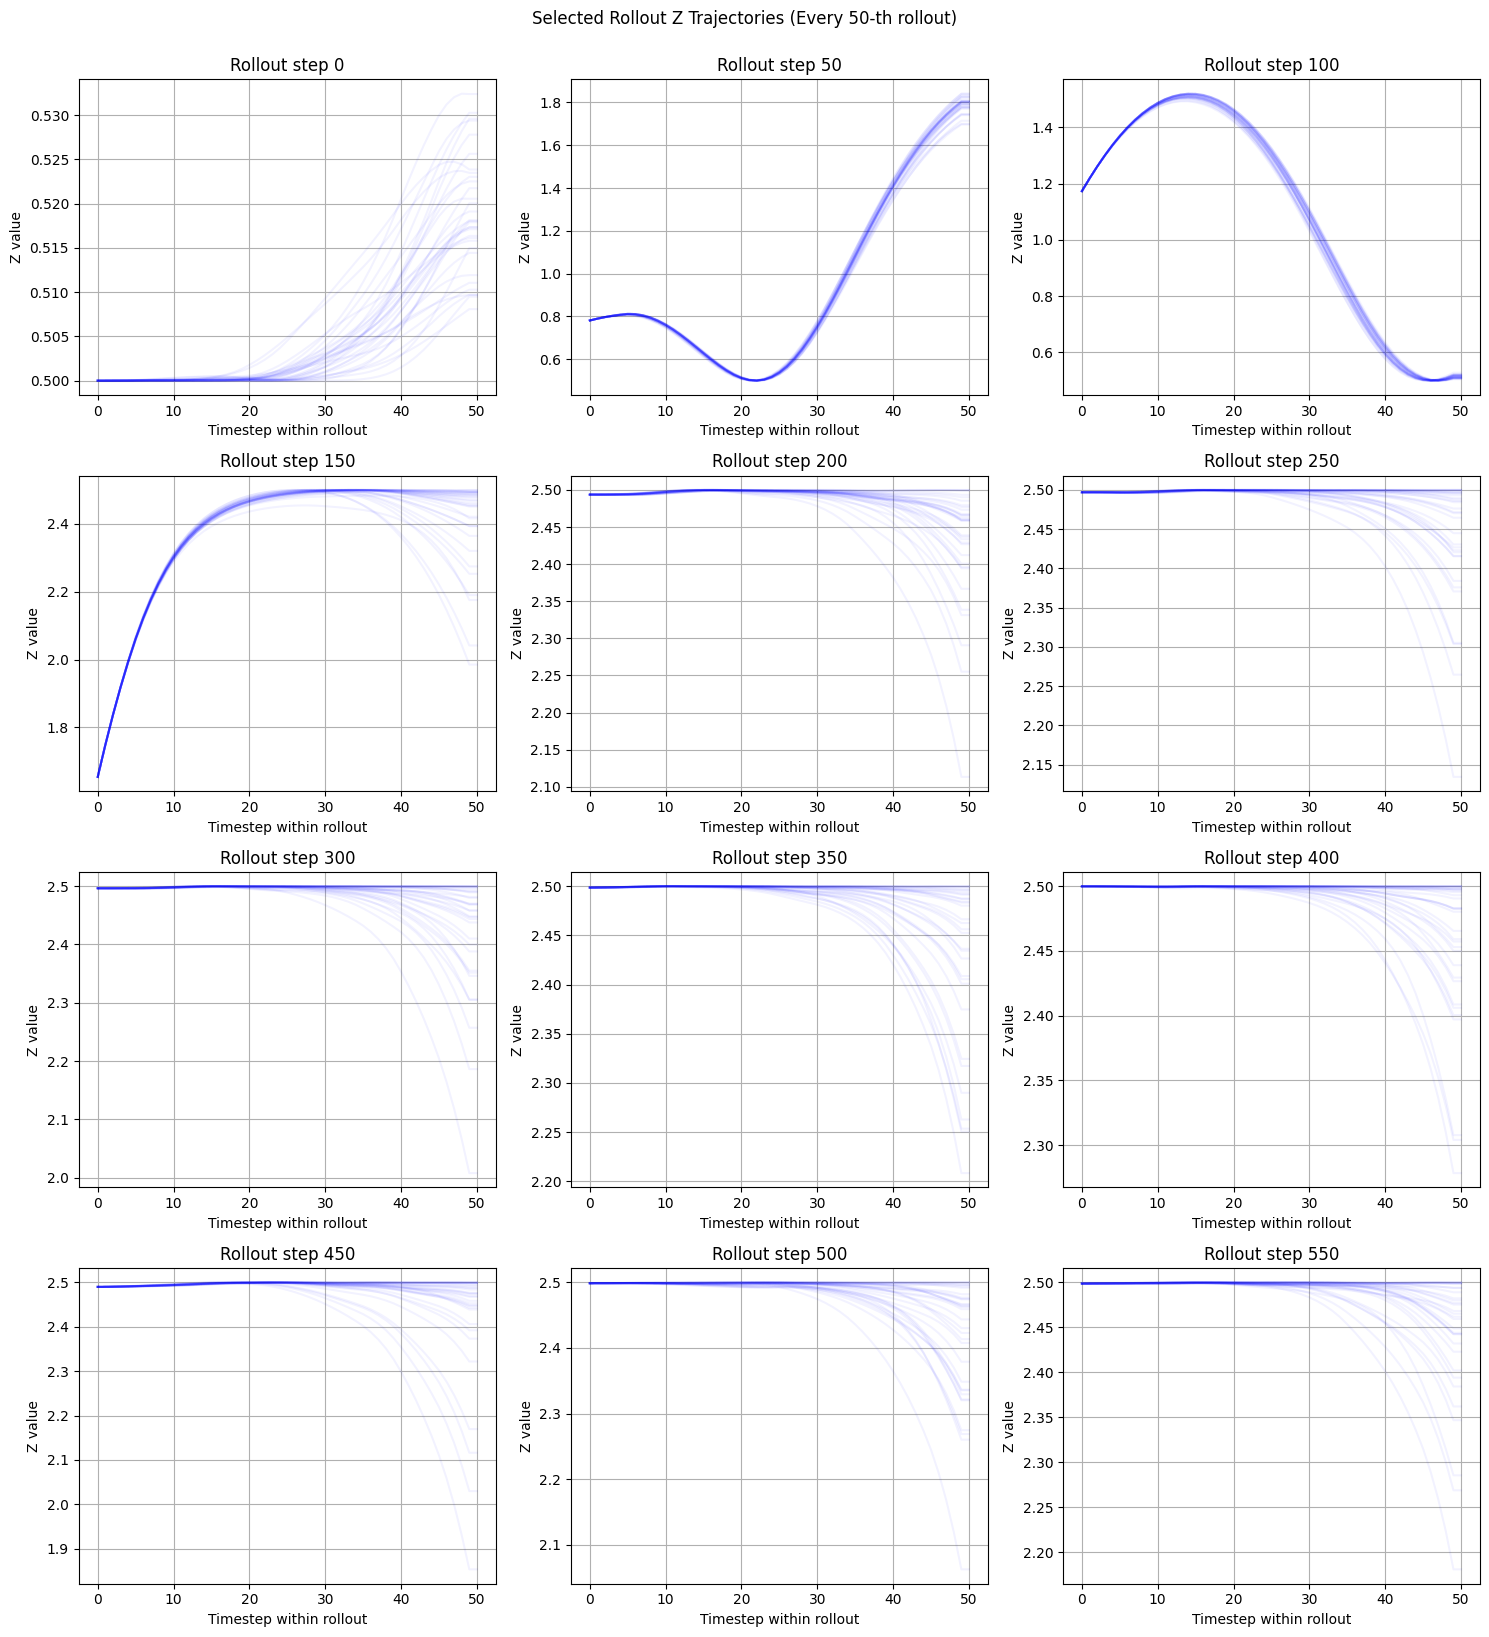

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

step_interval = 50
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

plt.figure(figsize=(5 * plots_per_row, 4 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    plt.subplot(num_rows, plots_per_row, plot_idx + 1)
    
    rollout_trace = rollouts[rollout_idx]["trace_sites"]  # (num_samples, steps, sites, 3)
    num_samples, steps, sites, _ = rollout_trace.shape

    # Only one site, take the Z coordinate (index 2)
    z_traces = rollout_trace[:, :, 0, 2]  # shape (num_samples, steps)
    time = np.linspace(0, steps - 1, steps)

    # Plot all Z traces with high transparency
    for s in range(num_samples):
        plt.plot(time, z_traces[s, :], alpha=0.05, color="blue")

    plt.xlabel("Timestep within rollout")
    plt.ylabel("Z value")
    plt.title(f"Rollout step {rollout_idx}")
    plt.grid(True)

plt.tight_layout()
plt.suptitle(f"Selected Rollout Z Trajectories (Every {step_interval}-th rollout)", y=1.02)
plt.show()


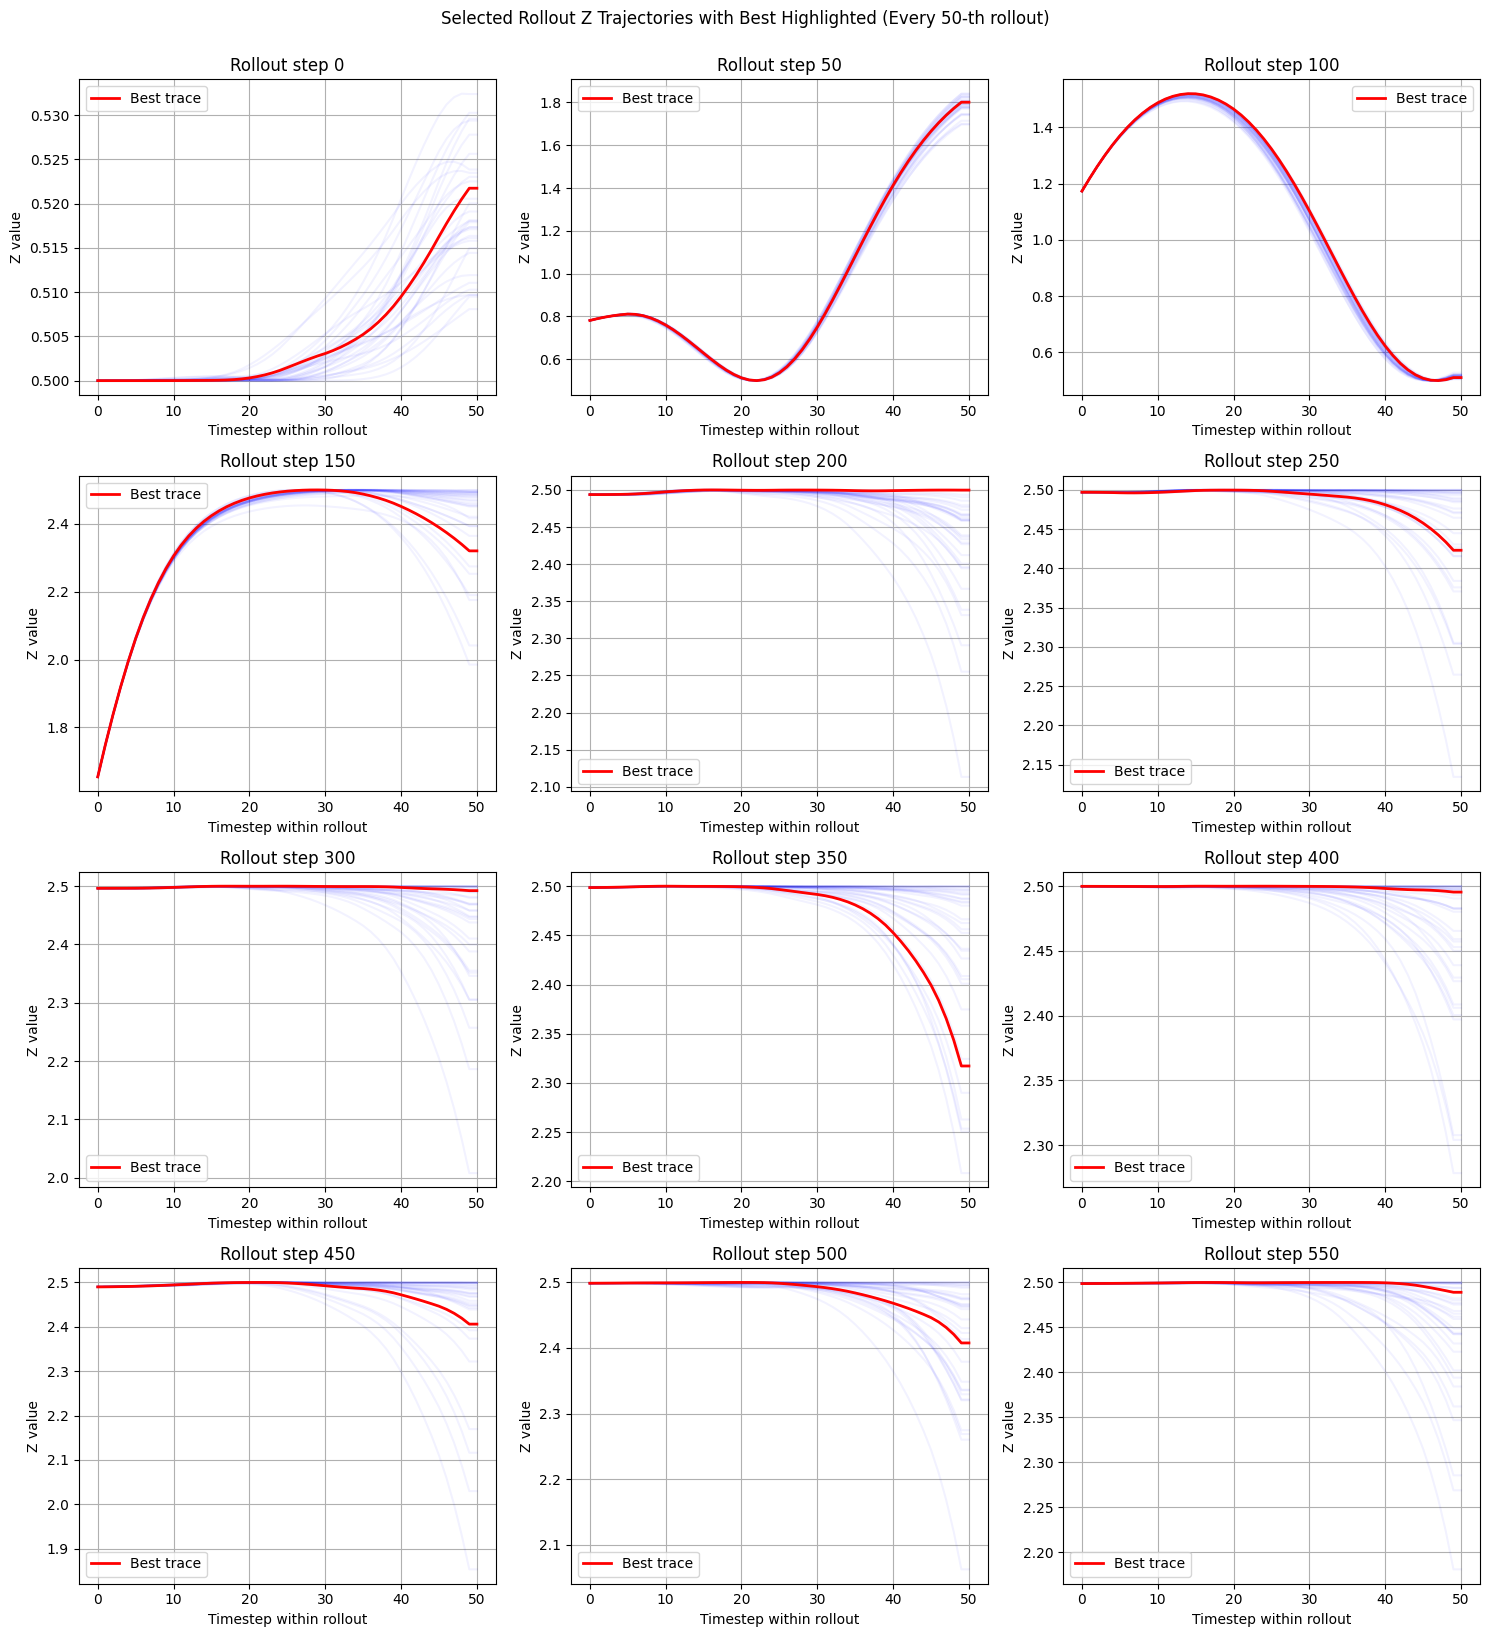

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

step_interval = 50
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

plt.figure(figsize=(5 * plots_per_row, 4 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    plt.subplot(num_rows, plots_per_row, plot_idx + 1)
    
    rollout_trace = rollouts[rollout_idx]["trace_sites"]  # (num_samples, steps, sites, 3)
    num_samples, steps, sites, _ = rollout_trace.shape

    # Only one site, take the Z coordinate (index 2)
    z_traces = rollout_trace[:, :, 0, 2]  # shape (num_samples, steps)
    time = np.linspace(0, steps - 1, steps)

    # Plot all sampled traces with high transparency
    for s in range(num_samples):
        plt.plot(time, z_traces[s, :], alpha=0.05, color="blue")

    # Overlay the best trace (already saved)
    # If best_traces is a list of arrays, get the corresponding index
    best_trace = best_traces[rollout_idx]  # shape (steps, sites, 3)
    best_z = best_trace[:, 0, 2]           # Z-coordinate
    plt.plot(time, best_z, color="red", linewidth=2, label="Best trace")

    plt.xlabel("Timestep within rollout")
    plt.ylabel("Z value")
    plt.title(f"Rollout step {rollout_idx}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle(f"Selected Rollout Z Trajectories with Best Highlighted (Every {step_interval}-th rollout)", y=1.02)
plt.show()


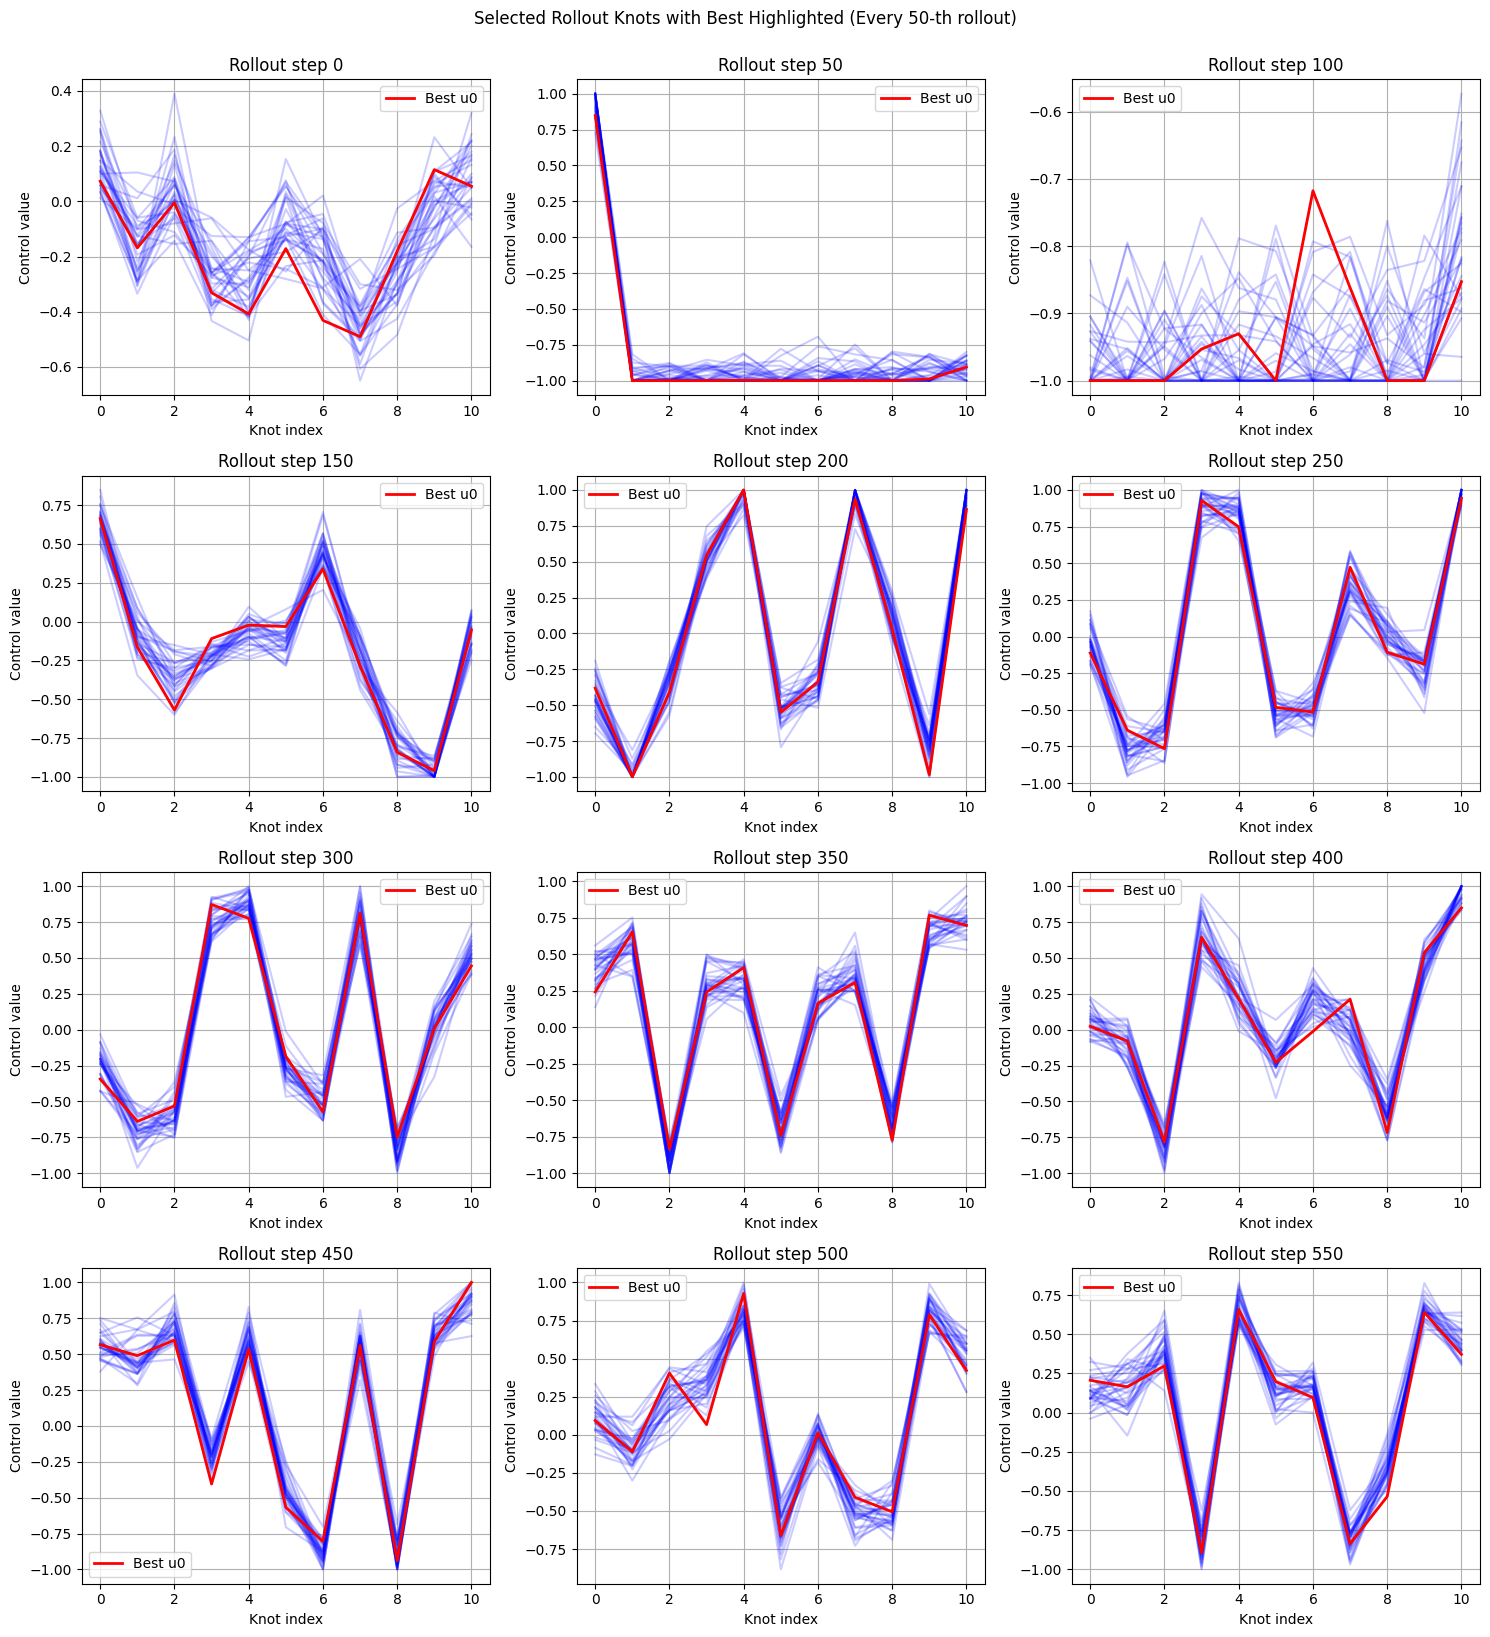

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import math

step_interval = 50
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

plt.figure(figsize=(5 * plots_per_row, 4 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    plt.subplot(num_rows, plots_per_row, plot_idx + 1)
    
    rollout_knots = rollouts[rollout_idx]["knots"]  # shape (num_samples, num_knots, nu)
    num_samples, num_knots, nu = rollout_knots.shape
    knot_indices = np.arange(num_knots)

    # Plot all knots for all sampled trajectories faintly
    for i in range(nu):
        for s in range(num_samples):
            plt.plot(knot_indices, rollout_knots[s, :, i], color="blue", alpha=0.2)

    # Highlight best rollout knots
    # Find best rollout (lowest total cost)
    rollout_costs = rollouts[rollout_idx]["costs"]
    total_costs = rollout_costs.sum(axis=1)
    best_idx = int(np.argmin(total_costs))
    best_knots = rollout_knots[best_idx]  # shape (num_knots, nu)
    for i in range(nu):
        plt.plot(knot_indices, best_knots[:, i], color="red", linewidth=2, label=f"Best u{i}")

    plt.xlabel("Knot index")
    plt.ylabel("Control value")
    plt.title(f"Rollout step {rollout_idx}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle(f"Selected Rollout Knots with Best Highlighted (Every {step_interval}-th rollout)", y=1.02)
plt.show()
